In [1]:
import tensorflow as tf
import numpy as np

2025-09-19 08:37:46.176286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-19 08:37:46.176314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-19 08:37:46.177106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-19 08:37:46.182369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-19 08:37:46.903053: W tensorflow/compiler/tf2

### Basics of Tensors

1. A `scalar` or a `rank-0` tensors contains a single value and no axes

In [2]:
rank_0_tensor = tf.constant(4)
rank_0_tensor

2025-09-19 08:37:47.875147: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-09-19 08:37:47.921110: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<tf.Tensor: shape=(), dtype=int32, numpy=4>

2. A `vector` or `rank-1` tensor is like a list of values. A vector has one axis

In [3]:
rank_1_tensor = tf.constant([5, 3, 4, 8])
rank_1_tensor

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([5, 3, 4, 8], dtype=int32)>

3. A `matrix` or `rank-2` tensor has two axis

In [4]:
rank_2_tensor = tf.constant([[1, 2],
                            [5, 6],
                            [8, 9]])
rank_2_tensor

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [5, 6],
       [8, 9]], dtype=int32)>

To be very specific about the data type, we can also change the dtype during the creation of the tensors

In [5]:
rank_2_tensor = tf.constant([[1, 2],
                            [5, 6],
                            [8, 9]], dtype=tf.float16)
rank_2_tensor

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 2.],
       [5., 6.],
       [8., 9.]], dtype=float16)>

### Rank 3 Tensor

In [6]:
rank_3_tensor = tf.constant(
    [ # 0
        [ # 1
            [0, 1, 2, 3, 4], # 3
            [5, 6, 7, 8, 9],
        ],

        [
            [10, 11, 12, 13, 14],
            [15, 16, 17, 18, 19],
        
        ],

        [
            [20, 21, 22, 23, 24],
            [25, 26, 27, 28, 29],
        ],
    ]
)

In [7]:
rank_3_tensor

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]], dtype=int32)>

### Converting a tensor to NumPy array
This can be achieved using `np.array` or `tensor.numpy`

In [8]:
# Using np.array
rank_3_tensor_to_array1 = np.array(rank_3_tensor)
rank_3_tensor_to_array1

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]], dtype=int32)

In [9]:
print(type(rank_3_tensor_to_array1))

<class 'numpy.ndarray'>


In [10]:
print(type(rank_3_tensor))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [11]:
# Using tensor.numpy
rank_3_tensor_to_array2 = rank_3_tensor.numpy
rank_3_tensor_to_array2

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]], dtype=int32)>>

### Arithmetic operations on Tensors

In [12]:
a = tf.constant([[1, 2],
                 [3, 4]])

b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2], dtype=tf.int32)

In [13]:
## Addition
print(tf.add(a, b))

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [14]:
# Multiplication
tf.multiply(a, b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [15]:
# Matrix Multiplication (matmul operation)
tf.matmul(a, b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 3],
       [7, 7]], dtype=int32)>

In [16]:
# Subtraction
tf.subtract(a, b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

### Using tensor specific symbols for operations

In [17]:
# Addition
a + b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [18]:
# Subtraction
a - b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

In [19]:
## Division
a / b

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

In [20]:
## Integer division
a // b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [21]:
# Remainder
a % b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0]], dtype=int32)>

In [22]:
## Square

a**2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [ 9, 16]], dtype=int32)>

In [23]:
## Square of a scalar product
a ** (2*b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [ 9, 16]], dtype=int32)>

In [24]:
# Multiplication
a * b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [25]:
# Matrix Multiplication
a @ b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 3],
       [7, 7]], dtype=int32)>

In [26]:
a & b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 0],
       [1, 0]], dtype=int32)>

In [27]:
a ^ b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 3],
       [2, 5]], dtype=int32)>

### Reduction operations
Tensors are use in all kinds of operations (or `Ops`)

In [28]:
rank_3_tensor

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]], dtype=int32)>

In [29]:
tensor = tf.constant([
    [10.0, 11.0, 18.0, 13.0, 25.0],
        [15.0, 16.0, 17.0, 18.0, 19.0]
])

tensor

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[10., 11., 18., 13., 25.],
       [15., 16., 17., 18., 19.]], dtype=float32)>

In [30]:
## Find the largest value of `rank_3_tensor`
tf.reduce_max(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=25.0>

In [31]:
## Find the smallest value of `rank_3_tensor`
tf.reduce_min(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [32]:
## Find the product value of `rank_3_tensor`
tf.reduce_prod(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=897914100000.0>

In [33]:
## Find the mean value of `rank_3_tensor`
tf.reduce_mean(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=16.2>

In [34]:
### Find the index of the largest value
tf.math.argmax(tensor)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 0, 1, 0])>

### Compute SoftMax

In [35]:
softmax_values = tf.nn.softmax(tensor[0])
softmax_values

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0562137e-07, 8.3076503e-07, 9.1104454e-04, 6.1385695e-06,
       9.9908161e-01], dtype=float32)>

In [36]:
tf.argmax(softmax_values)

<tf.Tensor: shape=(), dtype=int64, numpy=4>

In [37]:
tf.math.argmax(softmax_values)

<tf.Tensor: shape=(), dtype=int64, numpy=4>

### Other operations

In [38]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [39]:
print("Type of every element:", rank_4_tensor.dtype)

Type of every element: <dtype: 'float32'>


In [40]:
print("Number of axes:", rank_4_tensor.ndim)

Number of axes: 4


In [41]:
print("Shape of tensor:", rank_4_tensor.shape)

Shape of tensor: (3, 2, 4, 5)


In [42]:
# This returns a tensor
print("Rank of tensor:", tf.rank(rank_4_tensor))

Rank of tensor: tf.Tensor(4, shape=(), dtype=int32)


In [43]:
# This returns a tensor
print("Shape of tensor:", tf.shape(rank_4_tensor))

Shape of tensor: tf.Tensor([3 2 4 5], shape=(4,), dtype=int32)


In [44]:
print("Elements along axis -1 of tensor:", rank_4_tensor.shape[-1])

Elements along axis -1 of tensor: 5


In [45]:
print("Elements along axis -1 of tensor:", rank_4_tensor.shape[-1])

Elements along axis -1 of tensor: 5


In [46]:
print("Elements along axis -2 of tensor:", rank_4_tensor.shape[-2])

Elements along axis -2 of tensor: 4


In [47]:
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])

Elements along axis 0 of tensor: 3


In [48]:
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])

Elements along the last axis of tensor: 5


In [49]:
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Total number of elements (3*2*4*5):  120


### Indexing

### Manipulating Tensor Shapes
Reshaping a tensor is of gret utility

In [50]:
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1, 4], 
                 [2, 5], 
                 [3, 6]
                ])
x.shape

TensorShape([3, 2])

In [51]:
# converting the tensor into a Python list
x.shape.as_list

<bound method TensorShape.as_list of TensorShape([3, 2])>

Using th e`tf.reshape` operation to reshape a tensor into a new shape. This is fast and cheap as the underlying data does not need to be duplicated

In [52]:
reshape_x = tf.reshape(x, [2, 3])
reshape_x

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 4, 2],
       [5, 3, 6]], dtype=int32)>

In [53]:
y = tf.reshape(reshape_x, [3, 2])
y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)>

In [54]:
reshape_y = tf.reshape(y, [1, 6])
reshape_y

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 4, 2, 5, 3, 6]], dtype=int32)>

In [55]:
y_array = np.array(y)
y_array

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)

In [56]:
# NB: -1 tells NumPy to automatically infer the number of rows based on the array’s total size.
# 1 means the new shape will have 1 column.
y_array.reshape((-1, 1))

array([[1],
       [4],
       [2],
       [5],
       [3],
       [6]], dtype=int32)

In [57]:
reshape_yy = tf.reshape(y, [-1, 1])
reshape_yy

<tf.Tensor: shape=(6, 1), dtype=int32, numpy=
array([[1],
       [4],
       [2],
       [5],
       [3],
       [6]], dtype=int32)>

In [58]:
reshape_y2 = tf.reshape(y, [1, -1])
reshape_y2

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 4, 2, 5, 3, 6]], dtype=int32)>

In [59]:
reshape_y2.shape

TensorShape([1, 6])

### More examples on reshape

In [60]:
rank_3_tensor

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]], dtype=int32)>

In [61]:
rank_3_tensor.shape

TensorShape([3, 2, 5])

In [62]:
reshape_rank_3 = tf.reshape(rank_3_tensor, [5, 2, 3])
reshape_rank_3

<tf.Tensor: shape=(5, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29]]], dtype=int32)>

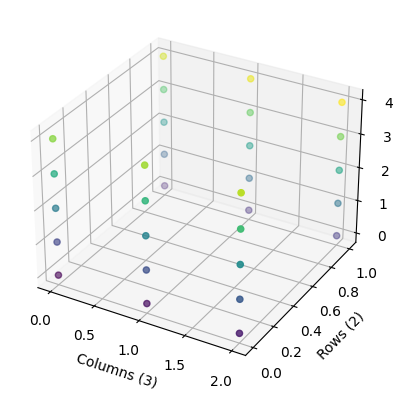

In [64]:
from mpl_toolkits.mplot3d import Axes3D

z, y, x = np.indices(tensor_np.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=tensor_np.flatten(), cmap="viridis")
ax.set_xlabel("Columns (3)")
ax.set_ylabel("Rows (2)")
ax.set_zlabel("Slices (5)")

plt.show()
